<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [14]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from pyAgrum.skbn import BNClassifier
import pyAgrum.skbn

# Comparing several binary classifiers (including Bayesian networks)

In [15]:
# From https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
# Code source: Gael Varoquaux
#              Andreas Muller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

In [16]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [17]:
# the data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
datasets_name=['Moons ',
               'Circle',
               'LinSep']

In [18]:
def showComparison(names,classifiers,datasets,datasets_name):# the results
    bnres=[None]*len(datasets_name)
    h = .02  # step size in the mesh
    fs=6

    figure = plt.figure(figsize=(10, 4))
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        print(datasets_name[ds_cnt]+' : ',end='')
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.4, random_state=42)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data",fontsize=fs)
        ax.set_ylabel(datasets_name[ds_cnt])

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k',marker=".")
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                   edgecolors='k',marker=".")
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            print(".",end="",flush=True)
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.7)

            # Plot the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k', alpha=0.2,marker='.')
            # Plot the testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       edgecolors='k',marker='.')

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name,fontsize=fs)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=12, horizontalalignment='right',color="white",
                    path_effects=[pe.withStroke(linewidth=2, foreground="black")])
            i += 1
        bnres[ds_cnt]=gum.BayesNet(classifiers[-1].bn)
        print()
    plt.tight_layout()
    plt.show()
    
    return bnres

In [19]:
# the classifiers
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes","QDA","TAN","BNClassifier"]

classifiers = [
  KNeighborsClassifier(3),
  SVC(kernel="linear", C=0.025),
  SVC(gamma=2, C=1),
  GaussianProcessClassifier(1.0 * RBF(1.0)),
  DecisionTreeClassifier(max_depth=5),
  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
  MLPClassifier(alpha=1, max_iter=1000),
  AdaBoostClassifier(),
  GaussianNB(),
  QuadraticDiscriminantAnalysis(),
  BNClassifier(learningMethod='TAN', aPriori='Laplace', aPrioriWeight=1, discretizationNbBins=5,discretizationStrategy="uniform",usePR=False),
  BNClassifier(learningMethod='MIIC', aPriori='Laplace', aPrioriWeight=1, discretizationNbBins=5,discretizationStrategy="uniform",usePR=False)
]

bnres=showComparison(names,classifiers,datasets,datasets_name)

Moons  : ............
Circle : ............
LinSep : ............


In [20]:
gnb.sideBySide(*bnres,captions=datasets_name)

The BN classifier works quite nicely and gives a graphical bonus : For LinSep, x1 is not a relevant feature.

# Comparing several n-ary classifiers including Bayesian networks (on IRIS dataset)

In [21]:
# From https://scikit-learn.org/stable/auto_examples/classification/plot_classification_probability.html#sphx-glr-auto-examples-classification-plot-classification-probability-py
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

Accuracy (train) for L1 logistic: 82.7% 
Accuracy (train) for L2 logistic (Multinomial): 82.7% 
Accuracy (train) for L2 logistic (OvR): 79.3% 
Accuracy (train) for Linear SVC: 82.0% 
Accuracy (train) for GPC: 82.7% 
Accuracy (train) for BN: 83.3% 


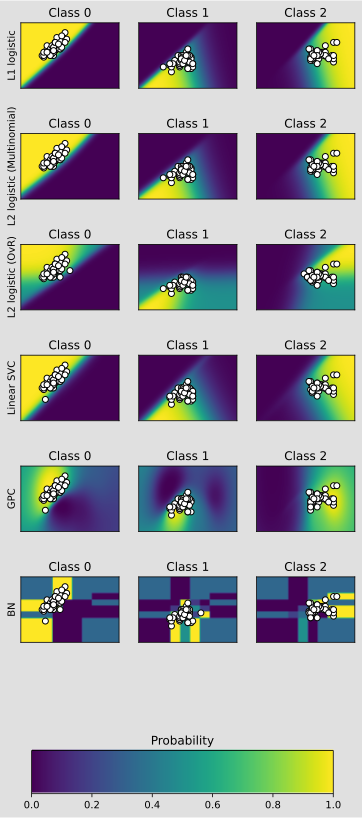

In [22]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 0:2]  # we only take the first two features for visualization
y = iris.target

n_features = X.shape[1]

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    'L1 logistic': LogisticRegression(C=C, penalty='l1',
                                      solver='saga',
                                      multi_class='multinomial',
                                      max_iter=10000),
    'L2 logistic (Multinomial)': LogisticRegression(C=C, penalty='l2',
                                                    solver='saga',
                                                    multi_class='multinomial',
                                                    max_iter=10000),
    'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2',
                                            solver='saga',
                                            multi_class='ovr',
                                           max_iter=10000),
    'Linear SVC': SVC(kernel='linear', C=C, probability=True,
                      random_state=0),
    'GPC': GaussianProcessClassifier(kernel),
    'BN' : BNClassifier(learningMethod='MIIC', 
                        aPriori='None', aPrioriWeight=1, 
                        discretizationNbBins=6,
                        discretizationStrategy="kmeans",
                        discretizationThreshold=10)
}

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='w', edgecolor='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()

In [23]:
classifiers['BN'].bn

(gum::BayesNet<double>@000001E73EC051F0) BN{nodes: 3, arcs: 2, domainSize: 108, dim: 120}

# Recognizing hand-written digits with Bayesian Networks

In [24]:
#From https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

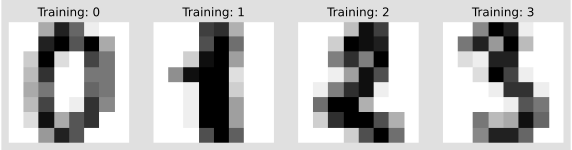

In [25]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

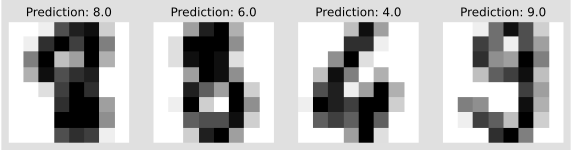

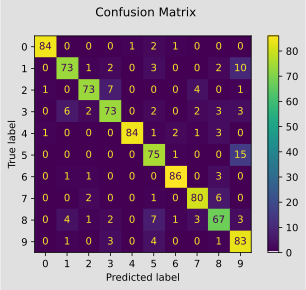

In [31]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
#clf = svm.SVC(gamma=0.001)
clf = BNClassifier(learningMethod='MIIC', aPriori='Laplace', aPrioriWeight=1, 
                   discretizationNbBins=3,discretizationStrategy="kmeans",discretizationThreshold=10)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')
  
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

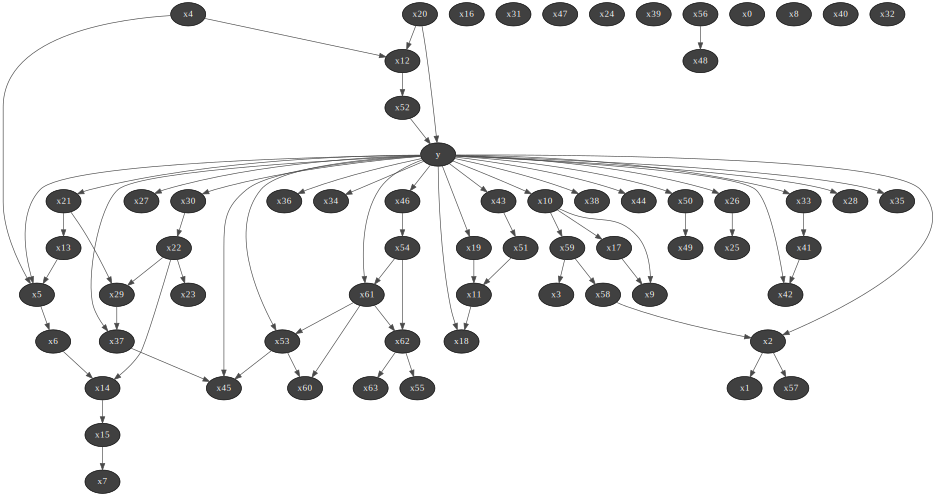

In [32]:
gnb.show(clf.bn,size="13!")

In [33]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier BNClassifier(aPriori='Laplace', discretizationNbBins=3,
             discretizationStrategy='kmeans', discretizationThreshold=10,
             learningMethod='MIIC'):
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        88
           1       0.86      0.80      0.83        91
           2       0.91      0.85      0.88        86
           3       0.84      0.80      0.82        91
           4       0.99      0.91      0.95        92
           5       0.79      0.82      0.81        91
           6       0.95      0.95      0.95        91
           7       0.89      0.90      0.89        89
           8       0.79      0.76      0.77        88
           9       0.72      0.90      0.80        92

    accuracy                           0.87       899
   macro avg       0.87      0.87      0.87       899
weighted avg       0.87      0.87      0.87       899




Markov blanket of the classifier:


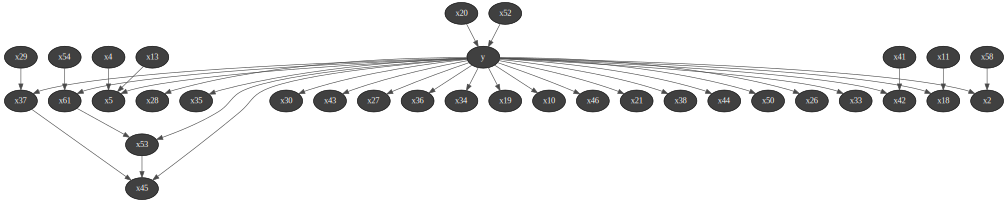

Number of pixels used for classification : 33/64


In [34]:
print("Markov blanket of the classifier:")
gnb.show(clf.MarkovBlanket,size="14!")
print(f"Number of pixels used for classification : {clf.MarkovBlanket.size()-1}/64")